<center>

## <span style="font-size: 35px; font-weight: bold;">¿Quién recibirá el próximo crédito azul": Introduciendo BLUE LOAN AI  </span>
    
</center>

## Tabla de contenidos

*[1.INTRODUCCIÓN](#1)<br />
*[2.OBJETIVO](#2)<br />
*[3. METODOLOGÍA](#2)<br />
*[4. PRE-PROCESAMIENTO DE DATOS](#4)<br />
*[3.1 Conclusiones Intermedias Pre-Procesamiento de Datos](#4.1)<br />
*[5. MODELACIÓN](#5)<br />
*[5.1 Conclusiones Intermedias Modelación](#5.1)<br />
*[6. CONCLUSIONES FINALES Y LIMITACIONES](#5)<br />
*[6.1 Conclusiones finales](#6.1)<br />
*[6.2 Limitaciones](#6.2)<br />

## 1. INTRODUCCIÓN <a class="anchor" id="1"></a>

**Descripción:** Blue Loan AI es una plataforma de inteligencia artificial diseñada para ayudar a las instituciones financieras a evaluar y gestionar préstamos azules. En su versión MVP, identifica empresas prospectos para la colocación de estos préstamos. 

**Impacto del proyecto**: BlueLoan AI promueve la asignación de préstamos azules a empresas del sector de acuicultura en Ecuador. Al dirigir capital hacia estas iniciativas, la plataforma acelera la transición hacia una economía baja en carbono.

## 2. OBJETIVO <a class="anchor" id="2"></a>

Identificar prospectos de empresas del sector de acuicultura del Ecuador con potencial de recibir préstamos azules.

## 3. METODOLOGÍA <a class="anchor" id="3"></a>

**1.- Integración de Datos:** Análsis de la base de datos datos de la SuperIntendencia de Compañías de Ecuador. Debido a la falta de base de datos ambientales empresariales, estos datos (económico-financieros) se utilizarán como “proxy” de la capacidad de la empresa de gestionar proyectos ambientales.

**2.- Modelo de Machine Learning:** Utiliza el algoritmo “K neareast Neighbors” para identificar compañías similares (vecinas en el espacio vectorial) a aquellas que ya han recibido una acreditción del Aquaculture Stwewarshiop Council (ASC)”. Se utilizan estos datos como un segundo “proxy”, de la capacidad de la empresa de gestionar proyectos ambientales. 

**3.- Dashboard interactivo:** La plataforma incluirá un dashboard interactivo para visualizar los resultados del modelo. 

## 4. PRE-PROCESAMIENTO DE DATOS <a id="4"></a>

De acuerdo a la metodología planteada, para este MVP vamos a necesitar dos bases de datos:

1.- Registros de la Superintendencia de Compañías de Ecuador.  
2.- Empresas de Ecuador que han obtenido una certificación con el "Aquaculture Stewarship Council" (ASC).

Los datos de la Superintendencia de Compañias de Ecuador fueron descargados de la página: https://appscvsmovil.supercias.gob.ec/ranking/reporte.html. Los datos corresponden a los registros del año 2023. 

En cuanto a los datos de las empresas del ASC, los mismos se obtuvieron de su página web: https://asc-aqua.org/

In [1]:
# Importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga los datos del proyecto

ciuu = pd.read_csv("Datos/bi_ciiu.csv")
compania = pd.read_csv("Datos/bi_compania.csv") 
ranking = pd.read_csv("Datos/bi_ranking.csv", low_memory=False) 
segmento = pd.read_csv("Datos/bi_segmento.csv")
companias_certificadas_asc = pd.read_excel('Datos/companias_asc.xlsx')
#companias_certificadas_asc = pd.read_csv("Datos/companias_asc.csv")

In [3]:
ciuu.head(5)

,ciiu,descripcion
0,A,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA."
1,A01,"AGRICULTURA, GANADERÍA, CAZA Y ACTIVIDADES DE ..."
2,A011,CULTIVO DE PLANTAS NO PERENNES.
3,A0111,"CULTIVO DE CEREALES (EXCEPTO ARROZ), LEGUMBRES..."
4,A0111.1,CULTIVO DE CEREALES.


In [4]:
compania.head(15)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN
5,9,1790050513001,AEROSOL DEL ECUADOR SA,ANÓNIMA ...,17,PICHINCHA ...,NaN
6,10,1700000000020,AEROVIAS ECUATORIANAS C LTDA AREA,RESPONSABILIDAD LIMITADA ...,17,PICHINCHA ...,NaN
7,11,1790044149001,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,SUCURSAL EXTRANJERA ...,17,PICHINCHA ...,NaN
8,13,0891706928001,AGENCIA COMERCIAL AZUAYA SA ACASA,ANÓNIMA ...,1,AZUAY ...,NaN
9,14,1700000000023,AGENCIA GENERAL DE SUMINISTROS SA AGDES,ANÓNIMA ...,17,PICHINCHA ...,NaN


In [5]:
compania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286869 entries, 0 to 286868
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   expediente  286869 non-null  int64 
 1   ruc         286869 non-null  object
 2   nombre      286869 non-null  object
 3   tipo        286869 non-null  object
 4   pro_codigo  286869 non-null  object
 5   provincia   286869 non-null  object
 6   Unnamed: 6  6 non-null       object
dtypes: int64(1), object(6)
memory usage: 15.3+ MB


In [6]:
compania.shape

(286869, 7)

In [7]:
ranking.head(5)

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
0,2008,1,25463.0,0,16.0,0.000000e+00,1.386558e+05,63242.19,0.00,18563.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,2,26.0,0,33.0,2.808959e+08,2.225880e+08,80289210.56,17629196.77,4980263.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,784.0,0,50.0,1.564886e+07,1.368537e+07,5597302.36,912111.72,269188.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,6,16538.0,0,67.0,0.000000e+00,6.248392e+05,-73907.76,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,11,410.0,0,89.0,4.968394e+07,2.397747e+06,-1122362.23,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464271 entries, 0 to 1464270
Data columns (total 54 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   anio                       1464271 non-null  int64  
 1   expediente                 1464271 non-null  int64  
 2   posicion_general           1027846 non-null  float64
 3   cia_imvalores              1464271 non-null  int64  
 4   id_estado_financiero       1027846 non-null  float64
 5   ingresos_ventas            1464271 non-null  float64
 6   activos                    1464271 non-null  float64
 7   patrimonio                 1464271 non-null  float64
 8   utilidad_an_imp            1464271 non-null  float64
 9   impuesto_renta             1464271 non-null  float64
 10  n_empleados                1464271 non-null  float64
 11  ingresos_totales           1181781 non-null  float64
 12  utilidad_ejercicio         1181781 non-null  float64
 13  utilidad_net

In [9]:
ranking["anio"].unique()

array([2008, 2022, 2009, 2021, 2020, 2019, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2023])

In [10]:
ranking.shape

(1464271, 54)

In [11]:
ranking.columns.values.tolist()

['anio',
 'expediente',
 'posicion_general',
 'cia_imvalores',
 'id_estado_financiero',
 'ingresos_ventas',
 'activos',
 'patrimonio',
 'utilidad_an_imp',
 'impuesto_renta',
 'n_empleados',
 'ingresos_totales',
 'utilidad_ejercicio',
 'utilidad_neta',
 'cod_segmento',
 'ciiu_n1',
 'ciiu_n6',
 'liquidez_corriente',
 'prueba_acida',
 'end_activo',
 'end_patrimonial',
 'end_activo_fijo',
 'end_corto_plazo',
 'end_largo_plazo',
 'cobertura_interes',
 'apalancamiento',
 'apalancamiento_financiero',
 'end_patrimonial_ct',
 'end_patrimonial_nct',
 'apalancamiento_c_l_plazo',
 'rot_cartera',
 'rot_activo_fijo',
 'rot_ventas',
 'per_med_cobranza',
 'per_med_pago',
 'impac_gasto_a_v',
 'impac_carga_finan',
 'rent_neta_activo',
 'margen_bruto',
 'margen_operacional',
 'rent_neta_ventas',
 'rent_ope_patrimonio',
 'rent_ope_activo',
 'roe',
 'roa',
 'fortaleza_patrimonial',
 'gastos_financieros',
 'gastos_admin_ventas',
 'depreciaciones',
 'amortizaciones',
 'costos_ventas_prod',
 'deuda_total',
 '

In [12]:
ranking["liquidez_corriente"].describe()

count    6.774950e+05
mean     2.321555e+02
std      5.739898e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.400000e+00
max      2.803542e+07
Name: liquidez_corriente, dtype: float64

In [13]:
liquidez_corriente = ranking[ranking["liquidez_corriente"]>1]
len(liquidez_corriente)

226787

In [14]:
ranking["cobertura_interes"].describe()

count    4.572260e+05
mean    -2.615291e+06
std      1.768899e+09
min     -1.196103e+12
25%      0.000000e+00
50%      0.000000e+00
75%      1.340000e+00
max      7.120201e+07
Name: cobertura_interes, dtype: float64

In [15]:
cobertura_interes = ranking[ranking["cobertura_interes"]>1]
len(cobertura_interes)

118181

In [16]:
ranking["end_patrimonial"].describe()

count    677495.000000
mean         15.696969
std        1054.467506
min        -678.900000
25%           0.000000
50%           0.000000
75%           1.570000
max      670655.790000
Name: end_patrimonial, dtype: float64

In [17]:
end_patrimonial = ranking[ranking["end_patrimonial"]>1]
len(end_patrimonial)

206235

In [18]:
ranking["margen_bruto"].describe()

count    4.572380e+05
mean    -1.587855e+03
std      9.811157e+05
min     -6.628143e+08
25%      0.000000e+00
50%      7.000000e-02
75%      1.000000e+00
max      1.206190e+03
Name: margen_bruto, dtype: float64

In [19]:
margen_bruto = ranking[ranking["margen_bruto"]>=1]
len(margen_bruto)

126572

In [20]:
segmento.head(5)

,id_segmento,segmento
0,1,MICROEMPRESA
1,2,PEQUEÑA
2,3,MEDIANA
3,4,GRANDE
4,0,NO DEFINIDO


In [21]:
segmento.shape

(5, 2)

In [22]:
companias_certificadas_asc['ruc'] = companias_certificadas_asc['ruc'].astype(str)

In [23]:
companias_certificadas_asc.head(5)

,ruc,nombre_compania,certificada
0,990900418001,AQUACULTURA PUROCONGO S.A.,1
1,1390150233001,DIVACCI S.A.,1
2,990976139001,MASI S.A.,1
3,992766107001,JELEBRAT S.A.,1
4,1391791488001,GRUPO DEGFER CIA. LTDA.,1


In [24]:
companias_certificadas_asc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ruc              29 non-null     object
 1   nombre_compania  29 non-null     object
 2   certificada      29 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


In [25]:
# Agrega ceros a los datos de ruc

companias_certificadas_asc['ruc'] = companias_certificadas_asc['ruc'].apply(lambda x: '0' + x if x[0] != '1' else x)
companias_certificadas_asc.head(5)

,ruc,nombre_compania,certificada
0,0990900418001,AQUACULTURA PUROCONGO S.A.,1
1,1390150233001,DIVACCI S.A.,1
2,0990976139001,MASI S.A.,1
3,0992766107001,JELEBRAT S.A.,1
4,1391791488001,GRUPO DEGFER CIA. LTDA.,1


In [26]:
companias_certificadas_asc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ruc              29 non-null     object
 1   nombre_compania  29 non-null     object
 2   certificada      29 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


Necesitamos una base de datos consolidada. Por lo tanto, vamos a realizar dos operaciones "join": 

1) Entre la base de datos "compania" y "companias_certificadas_asc" basado en en el número de RUC.  <br> 
2) Entre la base de datos "ranking" y "compania" basado en el número de expediente.

En base un primer "join" se aprecia que solo existen dos empresas en la base de datos "companias" que coinciden por núnero de ruc (verificado por el SRI) con los datos del ASC.

En ese sentido, no nos conviene el "left join", sino un "outer join" que una todos los datos. Posteriromente, podemos eliminar los duplciados. 

In [27]:
# Join no. 1

datos_companias_join_1 = pd.merge(compania,companias_certificadas_asc, on = "ruc", how='outer')
datos_companias_join_1.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN,NaN,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN


In [28]:
datos_companias_join_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286869 entries, 0 to 286868
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   expediente       286869 non-null  int64  
 1   ruc              286869 non-null  object 
 2   nombre           286869 non-null  object 
 3   tipo             286869 non-null  object 
 4   pro_codigo       286869 non-null  object 
 5   provincia        286869 non-null  object 
 6   Unnamed: 6       6 non-null       object 
 7   nombre_compania  29 non-null      object 
 8   certificada      29 non-null      float64
dtypes: float64(1), int64(1), object(7)
memory usage: 21.9+ MB


In [29]:
ruc = companias_certificadas_asc['ruc']
filtro_por_ruc_base_companias = datos_companias_join_1[datos_companias_join_1['ruc'].isin(ruc)]
filtro_por_ruc_base_companias

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada
4098,2151,0990033110001,SOCIEDAD NACIONAL DE GALAPAGOS CA,ANÓNIMA ...,9,GUAYAS ...,NaN,SOCIEDAD NACIONAL DE GALAPAGOS C.A.,1.0
7160,5274,0990171092001,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,1.0
16095,19679,0990553963001,PROMARISCO SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PROMARISCO S.A.,1.0
16126,19709,0990555575001,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,ANÓNIMA ...,9,GUAYAS ...,NaN,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,1.0
16519,19119,0990488401001,CAMARONES ROLESA SA,ANÓNIMA ...,9,GUAYAS ...,NaN,CAMARONES ROLESA SA,1.0
19744,22576,0991257721001,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,ANÓNIMA ...,9,GUAYAS ...,NaN,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,1.0
21546,19880,0990576459001,PRODUMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PRODUMAR S.A.,1.0
24969,23903,0790050487001,PESQUERA E INDUSTRIAL BRAVITO S.A,ANÓNIMA ...,7,EL ORO ...,NaN,PESQUERA E INDUSTRIAL BRAVITO S A,1.0
29257,34512,1390150233001,DIVACCI S.A.,ANÓNIMA ...,13,MANABI ...,NaN,DIVACCI S.A.,1.0
36855,41042,0990666253001,EXPORTADORA LANGOSMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,EXPORTADORA LANGOSMAR S.A.,1.0


In [30]:
filtro_por_ruc_base_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 4098 to 217158
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   expediente       29 non-null     int64  
 1   ruc              29 non-null     object 
 2   nombre           29 non-null     object 
 3   tipo             29 non-null     object 
 4   pro_codigo       29 non-null     object 
 5   provincia        29 non-null     object 
 6   Unnamed: 6       0 non-null      object 
 7   nombre_compania  29 non-null     object 
 8   certificada      29 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ KB


Para esta modelación, se filtrarán los datos de las empresas de acuerdo a su código CIIU. En ese sentido, este MVP de "Blue Loan AI" utilizará solo los datos de empresas vinculadas a la acuicultura (CIIU: A032) puesto que solo contamos con datos objetivo ("target") de estos sectores (de empresas certificadas por la ASC). 

In [31]:
# Filtra los datos de la SuperCias para acuicultura

ranking["ciiu_n6"] = ranking['ciiu_n6'].fillna('')
ranking_ciiu_A032 = ranking[ranking['ciiu_n6'].str.contains('A032')]

ranking_ciiu_A032.head(5)

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
1202,2022,22576,3.0,0,2118572.0,1.412874e+09,1.274285e+09,7.549777e+08,1.301194e+08,7555992.54,...,0.09,0.14,12195114.92,3.244702e+08,3336243.20,0.0,9.803852e+08,1.092807e+08,3052743.55,3.451556e+08
1210,2022,40424,11.0,0,2163074.0,8.814401e+08,4.892768e+08,2.303004e+08,7.612128e+07,7047425.16,...,0.14,0.07,7783463.69,5.520314e+07,414516.96,0.0,7.293640e+08,8.809702e+07,0.00,6.319420e+07
1243,2022,20090,44.0,1,2162645.0,1.625736e+08,4.842615e+08,1.174399e+08,2.844883e+06,947801.86,...,0.00,0.76,11286870.93,1.152243e+07,63909.46,0.0,1.385312e+08,1.418868e+08,49260761.45,2.280930e+07
1263,2022,703439,64.0,0,2163265.0,2.638757e+08,2.549503e+08,8.218674e+07,2.269180e+07,707853.11,...,0.08,0.26,8298086.61,1.867946e+07,1194625.85,0.0,2.104188e+08,3.000000e+07,0.00,2.697755e+07
1288,2022,44102,89.0,0,2178145.0,2.090268e+08,2.102912e+08,9.261121e+07,3.349346e+07,2920642.04,...,0.12,0.16,3042514.87,6.104162e+07,67365.98,0.0,1.083984e+08,1.719313e+07,0.00,6.408413e+07


In [32]:
ranking_ciiu_A032["ciiu_n6"]

1202       A0321.02
1210       A0321.02
1243       A0321.02
1263       A0321.01
1288       A0321.02
             ...   
1463759    A0321.02
1463841    A0321.02
1463950    A0321.02
1464191    A0321.01
1464267    A0321.01
Name: ciiu_n6, Length: 18627, dtype: object

In [33]:
ranking_ciiu_A032.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18627 entries, 1202 to 1464267
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   anio                       18627 non-null  int64  
 1   expediente                 18627 non-null  int64  
 2   posicion_general           14411 non-null  float64
 3   cia_imvalores              18627 non-null  int64  
 4   id_estado_financiero       14411 non-null  float64
 5   ingresos_ventas            18627 non-null  float64
 6   activos                    18627 non-null  float64
 7   patrimonio                 18627 non-null  float64
 8   utilidad_an_imp            18627 non-null  float64
 9   impuesto_renta             18627 non-null  float64
 10  n_empleados                18627 non-null  float64
 11  ingresos_totales           16603 non-null  float64
 12  utilidad_ejercicio         16603 non-null  float64
 13  utilidad_neta              16603 non-null

In [34]:
ranking_ciiu_A032.describe()

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,18627.000000,18627.000000,14411.000000,18627.000000,1.441100e+04,1.862700e+04,1.862700e+04,1.862700e+04,1.862700e+04,1.862700e+04,...,6389.000000,6389.000000,6.368000e+03,6.368000e+03,6.368000e+03,6.368000e+03,6.368000e+03,6.368000e+03,6.368000e+03,6.368000e+03
mean,2016.672089,213055.655930,26769.542988,0.003436,1.526887e+06,2.340759e+06,1.840628e+06,7.626948e+05,4.058359e+10,4.823910e+04,...,0.700781,24.018053,6.123684e+04,2.074464e+05,5.778247e+04,1.756025e+03,2.612848e+06,4.977238e+05,1.665256e+05,4.125733e+05
std,4.655633,243080.972429,22644.841723,0.058517,4.041721e+05,3.975029e+07,1.805694e+07,9.110232e+06,5.538878e+12,1.117310e+06,...,9.780458,1882.947186,6.337796e+05,4.315006e+06,5.771251e+05,3.473395e+04,2.371710e+07,4.701975e+06,1.994519e+06,4.998569e+06
min,2009.000000,712.000000,1.000000,0.000000,1.752400e+04,0.000000e+00,0.000000e+00,-2.316810e+07,-8.827049e+08,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.293093e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,2013.000000,44363.000000,9528.500000,0.000000,1.246576e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017.000000,109454.000000,19390.000000,0.000000,1.561360e+06,0.000000e+00,3.719929e+04,2.320200e+03,0.000000e+00,0.000000e+00,...,0.040000,0.050000,1.925500e+01,7.116525e+03,0.000000e+00,0.000000e+00,7.642008e+04,0.000000e+00,0.000000e+00,3.844874e+04
75%,2021.000000,302840.000000,38813.500000,0.000000,1.833334e+06,5.870362e+05,5.998688e+05,1.608277e+05,6.975260e+03,3.301555e+03,...,0.700000,0.670000,3.549693e+03,4.959726e+04,2.225293e+04,0.000000e+00,7.562003e+05,3.053629e+04,3.755525e+02,1.836627e+05
max,2023.000000,754231.000000,106238.000000,1.000000,2.192966e+06,4.519276e+09,1.274285e+09,7.549777e+08,7.559503e+14,1.068924e+08,...,650.000000,150506.610000,2.333394e+07,3.244702e+08,3.340453e+07,2.184585e+06,9.803852e+08,1.520120e+08,8.104633e+07,3.451556e+08


In [35]:
 # Join no. 2
    
datos_companias = pd.merge(datos_companias_join_1, ranking_ciiu_A032, on = "expediente", how='outer')
datos_companias = datos_companias.drop_duplicates(subset=['ruc'])
datos_companias.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada,anio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286646 entries, 0 to 302074
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   expediente                 286646 non-null  int64  
 1   ruc                        286645 non-null  object 
 2   nombre                     286645 non-null  object 
 3   tipo                       286645 non-null  object 
 4   pro_codigo                 286645 non-null  object 
 5   provincia                  286645 non-null  object 
 6   Unnamed: 6                 6 non-null       object 
 7   nombre_compania            29 non-null      object 
 8   certificada                29 non-null      float64
 9   anio                       3270 non-null    float64
 10  posicion_general           1932 non-null    float64
 11  cia_imvalores              3270 non-null    float64
 12  id_estado_financiero       1932 non-null    float64
 13  ingresos_ventas            32

In [37]:
filtro_por_ruc_base_companias = datos_companias[datos_companias['ruc'].isin(ruc)]
filtro_por_ruc_base_companias.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada,anio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
4119,2151,0990033110001,SOCIEDAD NACIONAL DE GALAPAGOS CA,ANÓNIMA ...,9,GUAYAS ...,NaN,SOCIEDAD NACIONAL DE GALAPAGOS C.A.,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7294,5274,0990171092001,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,1.0,2022.0,...,0.10,0.00,71392.94,332841.82,0.00,0.0,1.659848e+07,0.00,0.00,478220.48
16556,19679,0990553963001,PROMARISCO SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PROMARISCO S.A.,1.0,2022.0,...,0.01,0.76,6370771.29,19733700.06,2436690.14,0.0,1.824988e+08,19934339.84,16348871.22,50783905.74
16616,19709,0990555575001,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,ANÓNIMA ...,9,GUAYAS ...,NaN,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,1.0,2022.0,...,0.17,0.03,0.00,428852.53,892.44,0.0,1.002861e+07,0.00,0.00,428852.53
17089,19119,0990488401001,CAMARONES ROLESA SA,ANÓNIMA ...,9,GUAYAS ...,NaN,CAMARONES ROLESA SA,1.0,2022.0,...,0.04,0.32,0.00,0.00,0.00,0.0,0.000000e+00,0.00,0.00,0.00


In [38]:
filtro_por_ruc_base_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 4119 to 231497
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   expediente                 29 non-null     int64  
 1   ruc                        29 non-null     object 
 2   nombre                     29 non-null     object 
 3   tipo                       29 non-null     object 
 4   pro_codigo                 29 non-null     object 
 5   provincia                  29 non-null     object 
 6   Unnamed: 6                 0 non-null      object 
 7   nombre_compania            29 non-null     object 
 8   certificada                29 non-null     float64
 9   anio                       26 non-null     float64
 10  posicion_general           26 non-null     float64
 11  cia_imvalores              26 non-null     float64
 12  id_estado_financiero       26 non-null     float64
 13  ingresos_ventas            26 non-null     fl

Se eliminarán las columnas que no son necesarias para la modelación.

In [39]:
# Elimina columnas que no son necesarias para la modelación

datos_companias = datos_companias.drop(["anio", 
                                            "posicion_general",
                                           "id_estado_financiero",
                                            "ciiu_n1",
                                            "ciiu_n6",
                                            "Unnamed: 6", 
                                            "expediente",
                                            "tipo",
                                            "pro_codigo",
                                            "provincia",
                                            "nombre_compania"
                                           ], axis=1)
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286646 entries, 0 to 302074
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ruc                        286645 non-null  object 
 1   nombre                     286645 non-null  object 
 2   certificada                29 non-null      float64
 3   cia_imvalores              3270 non-null    float64
 4   ingresos_ventas            3270 non-null    float64
 5   activos                    3270 non-null    float64
 6   patrimonio                 3270 non-null    float64
 7   utilidad_an_imp            3270 non-null    float64
 8   impuesto_renta             3270 non-null    float64
 9   n_empleados                3270 non-null    float64
 10  ingresos_totales           1610 non-null    float64
 11  utilidad_ejercicio         1610 non-null    float64
 12  utilidad_neta              1610 non-null    float64
 13  cod_segmento               14

In [40]:
datos_companias.describe()

,certificada,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,29.0,3270.000000,3.270000e+03,3.270000e+03,3.270000e+03,3.270000e+03,3.270000e+03,3270.000000,1.610000e+03,1.610000e+03,...,1278.000000,1278.000000,1.277000e+03,1.277000e+03,1.277000e+03,1277.000000,1.277000e+03,1.277000e+03,1.277000e+03,1.277000e+03
mean,1.0,0.000612,2.262171e+06,2.056692e+06,8.365483e+05,2.311776e+11,8.392558e+04,25.018349,4.547930e+06,5.523937e+11,...,0.375368,0.563779,8.336569e+04,6.315678e+05,1.217792e+04,491.106226,4.539182e+06,5.242489e+05,6.342582e+04,7.540836e+05
std,0.0,0.024727,3.155126e+07,2.686065e+07,1.450075e+07,1.321963e+13,2.537267e+06,320.393663,4.508418e+07,2.216468e+13,...,3.133512,2.517835,6.392593e+05,9.456653e+06,1.255945e+05,6949.088312,3.759463e+07,5.786159e+06,1.469519e+06,1.019121e+07
min,1.0,0.000000,0.000000e+00,0.000000e+00,-4.860790e+06,-1.423259e+07,0.000000e+00,0.000000,0.000000e+00,-2.875238e+06,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,...,0.000000,0.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.0,0.000000,0.000000e+00,8.000000e+02,4.000000e+02,0.000000e+00,0.000000e+00,3.000000,1.199100e+02,0.000000e+00,...,0.010000,0.105000,0.000000e+00,1.054090e+04,0.000000e+00,0.000000,1.459115e+04,0.000000e+00,0.000000e+00,1.309764e+04
75%,1.0,0.000000,2.935250e+03,2.284190e+05,3.120888e+04,0.000000e+00,0.000000e+00,6.000000,7.032791e+05,5.825065e+03,...,0.090000,1.000000,2.408590e+03,1.234803e+05,0.000000e+00,0.000000,8.825759e+05,1.428540e+03,0.000000e+00,1.541793e+05
max,1.0,1.000000,1.412874e+09,1.274285e+09,7.549777e+08,7.559503e+14,1.068924e+08,15598.000000,1.422904e+09,8.893534e+14,...,83.830000,58.570000,1.219511e+07,3.244702e+08,3.336243e+06,207001.170000,9.803852e+08,1.418868e+08,4.926076e+07,3.451556e+08


**Para escoger a las empresas con una situación económica-financiera estable se aplicará un filtro con los siguintes criterios:**

1) liquidez corriente > 1 <br/> 


 

In [41]:
# Calcular el percentil 75 de la columna 'ingresos_ventas'
#percentil_75 = datos_companias['ingresos_ventas'].quantile(0.75)
#datos_companias = datos_companias[datos_companias['liquidez_corriente'] >= percentil_75]

# Filtrar las filas según las condiciones establecidas
#datos_companias = datos_companias[
#                  (datos_companias['liquidez_corriente'] > 1) &
#                  (datos_companias['end_patrimonial'] > 1) &
#                  (datos_companias['cobertura_interes'] > 1) &
#                  (datos_companias['margen_bruto'] >= 1)
#                  ]

# Filtra las empresas con índice de liquidez corriente mayor o igual a 1.
datos_companias = datos_companias[datos_companias['liquidez_corriente'] >= 1]


# Mostrar el DataFrame filtrado
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 4126 to 280958
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ruc                        512 non-null    object 
 1   nombre                     512 non-null    object 
 2   certificada                13 non-null     float64
 3   cia_imvalores              512 non-null    float64
 4   ingresos_ventas            512 non-null    float64
 5   activos                    512 non-null    float64
 6   patrimonio                 512 non-null    float64
 7   utilidad_an_imp            512 non-null    float64
 8   impuesto_renta             512 non-null    float64
 9   n_empleados                512 non-null    float64
 10  ingresos_totales           512 non-null    float64
 11  utilidad_ejercicio         512 non-null    float64
 12  utilidad_neta              512 non-null    float64
 13  cod_segmento               512 non-null    f

In [73]:
# Filtra la base de prospectos principales

base_prospectos_principales = datos_companias[datos_companias['certificada'] == 1]
ruc = base_prospectos_principales['ruc']
mask = compania['ruc'].isin(ruc)
base_prospectos_principales = compania[mask]
base_prospectos_principales = base_prospectos_principales.drop(["expediente", "pro_codigo", "Unnamed: 6", "tipo"], axis=1)
base_prospectos_principales.to_csv('base_prospectos_principales.csv', index=False) 

In [43]:
datos_companias.describe()

,certificada,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,13.0,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000,5.120000e+02,5.120000e+02,...,512.000000,512.000000,5.110000e+02,5.110000e+02,5.110000e+02,511.000000,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02
mean,1.0,0.001953,1.077879e+07,9.669104e+06,4.569357e+06,1.476466e+12,1.160446e+05,88.835938,1.087459e+07,1.737019e+12,...,0.207480,0.325293,1.455535e+05,1.305450e+06,1.910922e+04,492.794384,8.374932e+06,1.007576e+06,1.055297e+05,1.493096e+06
std,0.0,0.044194,7.737830e+07,6.669298e+07,3.633825e+07,3.340860e+13,6.401205e+05,784.015436,7.779955e+07,3.930424e+13,...,0.886232,1.339208,9.502489e+05,1.487500e+07,1.621545e+05,4937.262658,5.737998e+07,9.013689e+06,2.183049e+06,1.590103e+07
min,1.0,0.000000,0.000000e+00,2.612400e+02,-1.143253e+06,-1.423259e+07,0.000000e+00,1.000000,0.000000e+00,-7.590022e+05,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.0,0.000000,3.035836e+04,8.342392e+04,1.455075e+04,0.000000e+00,0.000000e+00,4.000000,4.888323e+04,0.000000e+00,...,0.000000,0.000000,0.000000e+00,3.005895e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.089775e+03
50%,1.0,0.000000,4.475381e+05,4.905825e+05,1.067761e+05,4.928550e+02,7.741400e+02,5.000000,4.643447e+05,5.066435e+03,...,0.035000,0.040000,6.448000e+01,4.269464e+04,0.000000e+00,0.000000,2.589528e+05,0.000000e+00,0.000000e+00,6.478394e+04
75%,1.0,0.000000,2.113641e+06,2.386404e+06,8.189702e+05,3.614541e+04,1.161247e+04,16.000000,2.136168e+06,7.878020e+04,...,0.132500,0.270000,6.751270e+03,2.162278e+05,2.865740e+03,0.000000,1.544826e+06,4.541860e+03,0.000000e+00,2.721181e+05
max,1.0,1.000000,1.412874e+09,1.274285e+09,7.549777e+08,7.559503e+14,7.649597e+06,15598.000000,1.422904e+09,8.893534e+14,...,11.890000,27.170000,1.219511e+07,3.244702e+08,3.336243e+06,86205.720000,9.803852e+08,1.418868e+08,4.926076e+07,3.451556e+08


In [44]:
print(type(datos_companias))

<class 'pandas.core.frame.DataFrame'>


In [45]:
# Rellena de datos 

datos_companias['certificada'] = datos_companias['certificada'].fillna(0)

datos_companias[['apalancamiento', 
                 'apalancamiento_financiero',
                 'apalancamiento_c_l_plazo',
                 'margen_operacional',
                 'gastos_financieros',
                 'end_patrimonial_nct',
                 'gastos_admin_ventas',
                 'depreciaciones',
                 'amortizaciones',
                 'costos_ventas_prod',
                 'deuda_total_c_plazo',
                 'deuda_total',
                 'total_gastos'       
                ]] = datos_companias[['apalancamiento', 
                 'apalancamiento_financiero',
                 'apalancamiento_c_l_plazo',
                 'margen_operacional',
                 'gastos_financieros',
                 'gastos_admin_ventas',
                 'depreciaciones',
                 'amortizaciones',
                 'costos_ventas_prod',
                 'end_patrimonial_nct',
                 'deuda_total_c_plazo',
                 'deuda_total',
                 'total_gastos']].fillna(
                datos_companias[['apalancamiento', 
                 'apalancamiento_financiero',
                 'apalancamiento_c_l_plazo',
                 'margen_operacional',
                 'gastos_financieros',
                 'gastos_admin_ventas',
                 'depreciaciones',
                 'end_patrimonial_nct',
                 'amortizaciones',
                 'costos_ventas_prod',
                 'deuda_total_c_plazo',
                 'deuda_total',
                 'total_gastos']].median())


datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 4126 to 280958
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ruc                        512 non-null    object 
 1   nombre                     512 non-null    object 
 2   certificada                512 non-null    float64
 3   cia_imvalores              512 non-null    float64
 4   ingresos_ventas            512 non-null    float64
 5   activos                    512 non-null    float64
 6   patrimonio                 512 non-null    float64
 7   utilidad_an_imp            512 non-null    float64
 8   impuesto_renta             512 non-null    float64
 9   n_empleados                512 non-null    float64
 10  ingresos_totales           512 non-null    float64
 11  utilidad_ejercicio         512 non-null    float64
 12  utilidad_neta              512 non-null    float64
 13  cod_segmento               512 non-null    f

In [46]:
variables_cuantitativas = ['cia_imvalores', 'ingresos_ventas', 'activos', 
                          'patrimonio', 'utilidad_an_imp',
                          'impuesto_renta', 'n_empleados',
                          'ingresos_totales', 'utilidad_ejercicio',
                          'total_gastos']

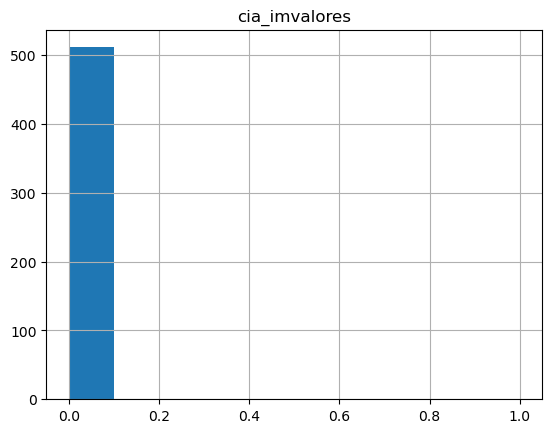

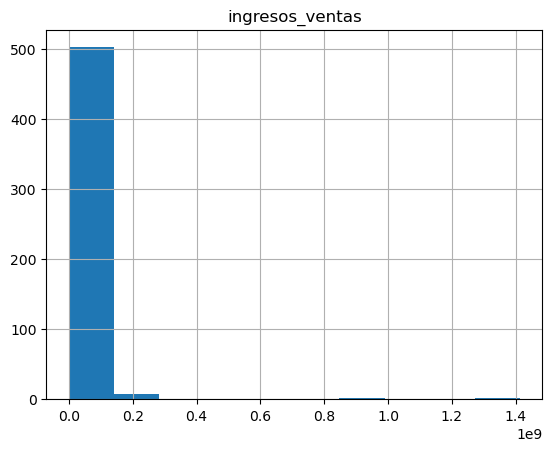

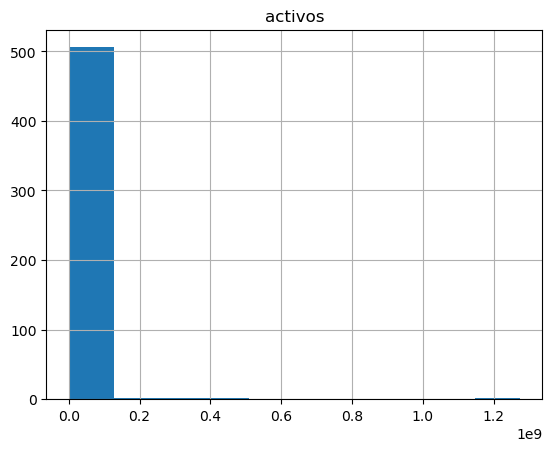

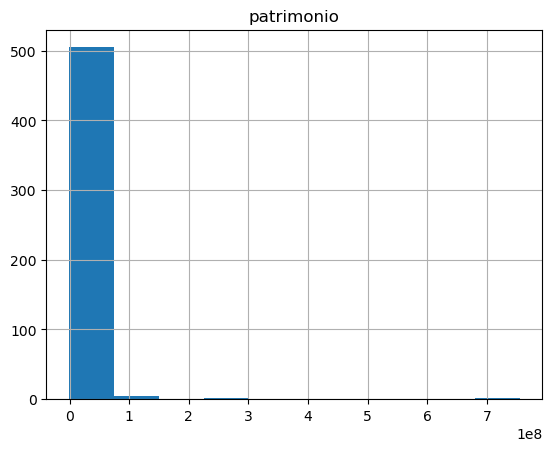

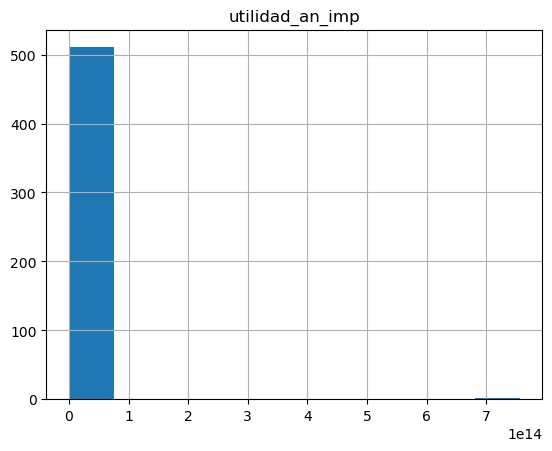

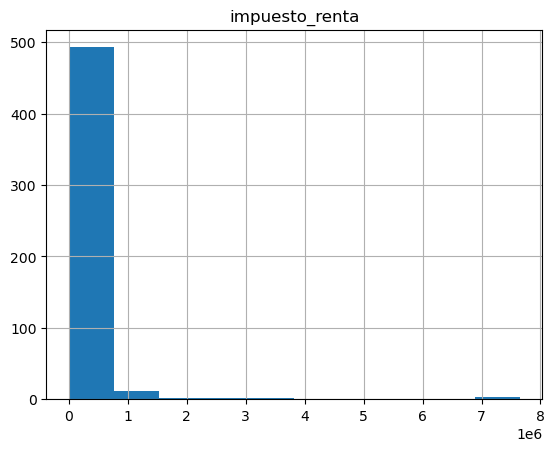

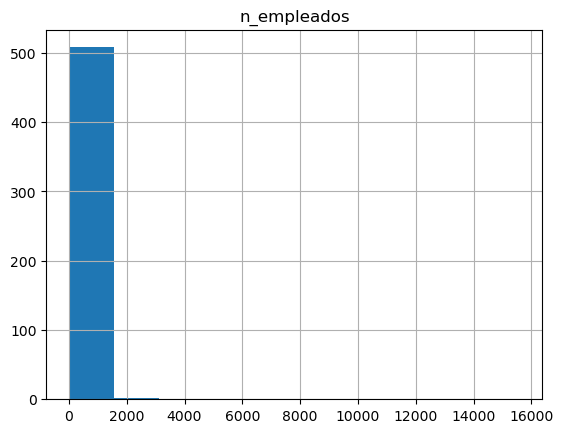

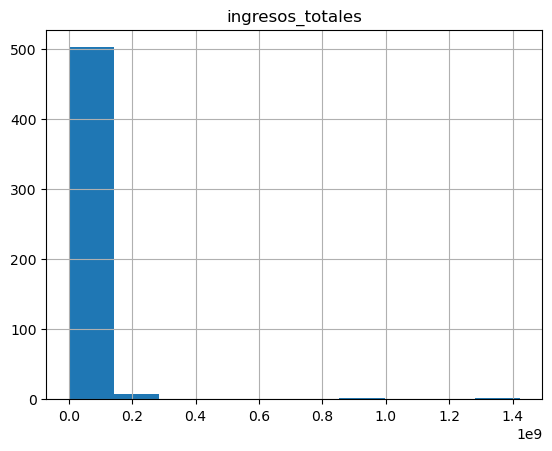

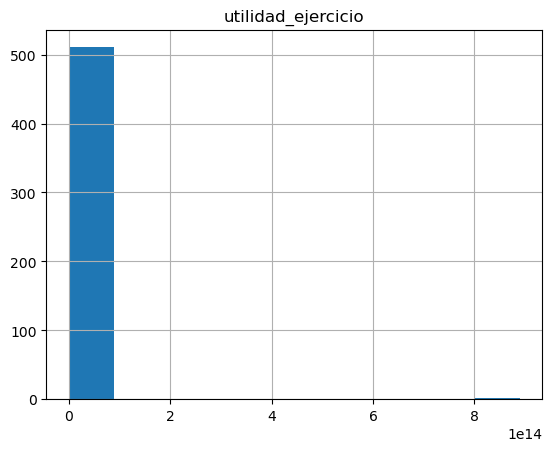

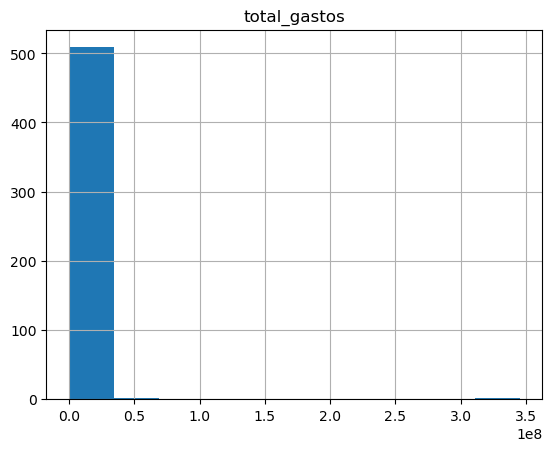

In [47]:
for variable in range(len(variables_cuantitativas)):
    datos_companias.hist(variables_cuantitativas[variable])

Text(0.5, 1.0, 'Ingresos por Ventas')

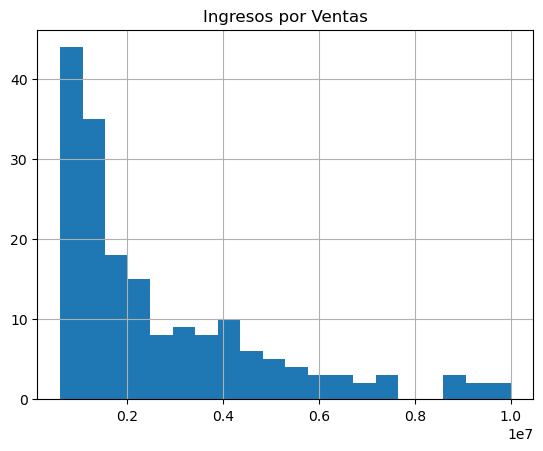

In [48]:
datos_companias["ingresos_ventas"].hist(bins = 20, range = (600000, 10000000))
plt.title('Ingresos por Ventas')

Text(0.5, 1.0, 'Activos')

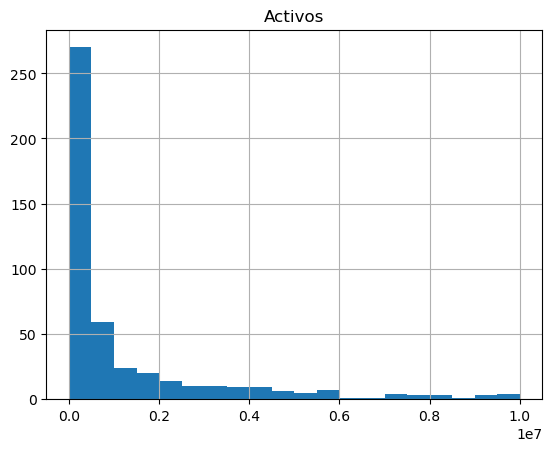

In [49]:
datos_companias["activos"].hist(bins = 20, range = (0, 10000000))
plt.title('Activos')

Text(0.5, 1.0, 'Patrimonio')

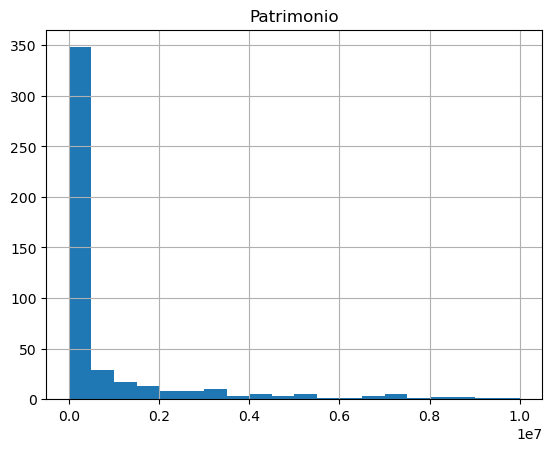

In [50]:
datos_companias["patrimonio"].hist(bins = 20, range = (0, 10000000))
plt.title('Patrimonio')

Text(0.5, 1.0, 'Utilidades antes de impuestos')

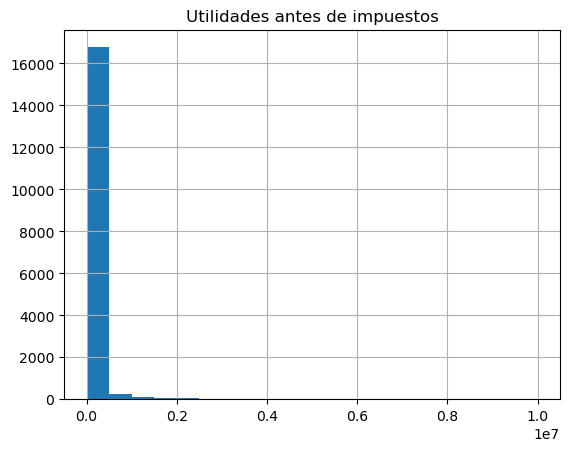

In [51]:
ranking_ciiu_A032["utilidad_an_imp"].hist(bins = 20, range = (0, 10000000))
plt.title('Utilidades antes de impuestos')

Text(0.5, 1.0, 'Impuesto a la Renta')

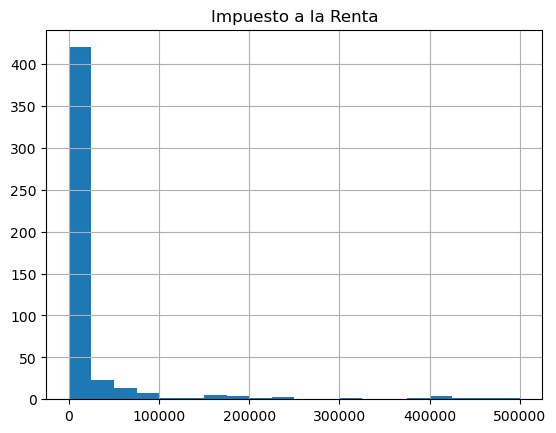

In [52]:
datos_companias["impuesto_renta"].hist(bins = 20, range = (0, 500000))
plt.title('Impuesto a la Renta')

Text(0.5, 1.0, 'Número de Empleados')

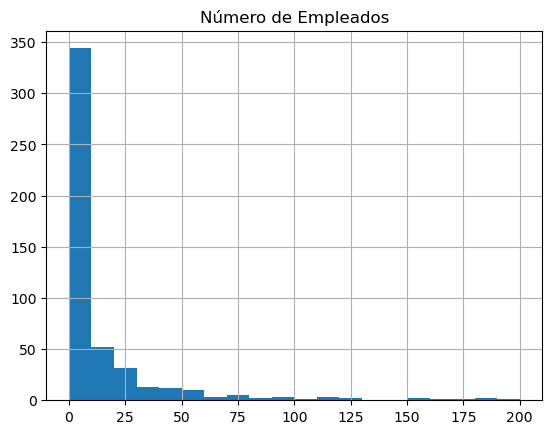

In [53]:
datos_companias["n_empleados"].hist(bins = 20, range = (0,200))
plt.title('Número de Empleados')

Text(0.5, 1.0, 'Ingresos Totales')

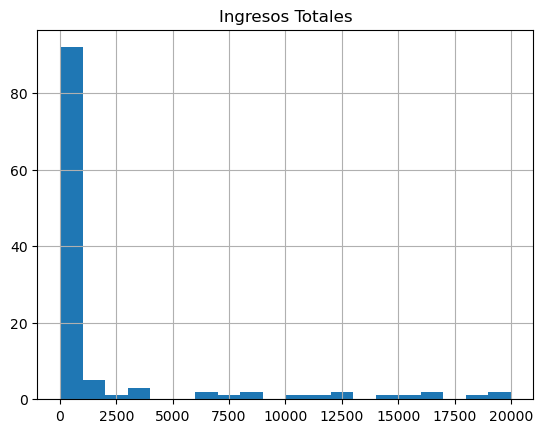

In [54]:
datos_companias["ingresos_totales"].hist(bins = 20, range = (0,20000))
plt.title('Ingresos Totales')

Text(0.5, 1.0, 'Utilidad del Ejercicio')

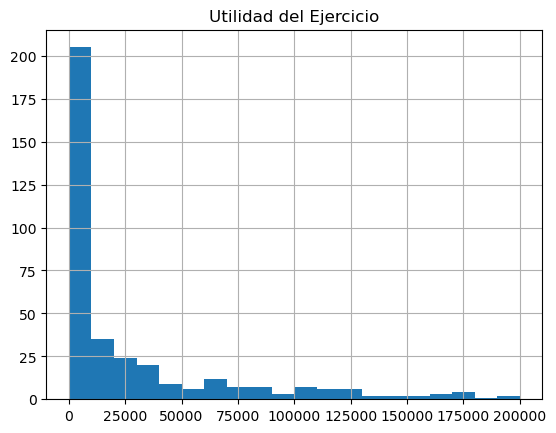

In [55]:
datos_companias["utilidad_ejercicio"].hist(bins = 20, range = (0,200000))
plt.title('Utilidad del Ejercicio')

Text(0.5, 1.0, 'Total de Gastos')

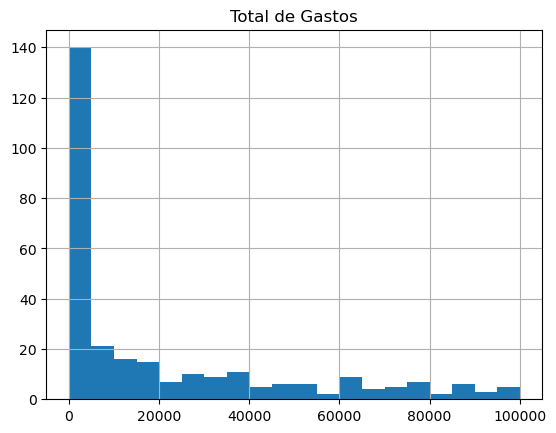

In [56]:
datos_companias["total_gastos"].hist(bins = 20, range = (0,100000))
plt.title('Total de Gastos')

**Diagramas de Caja**

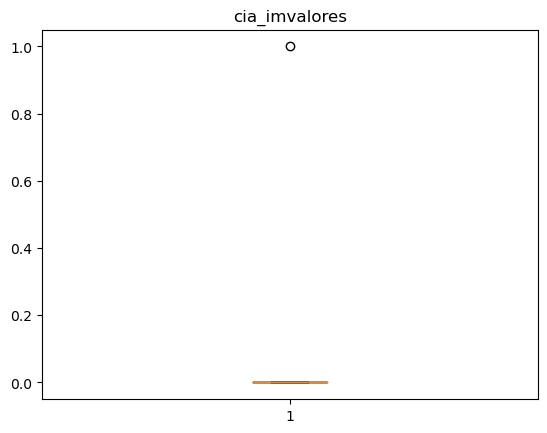

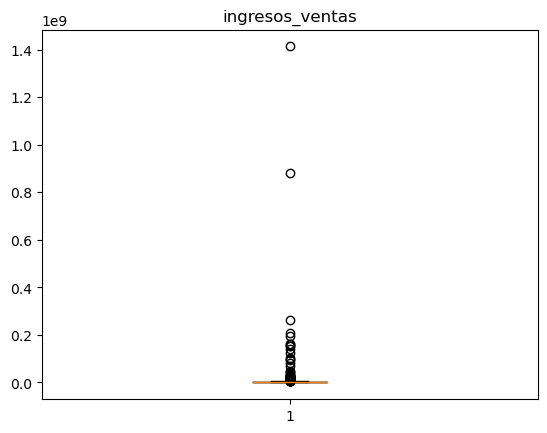

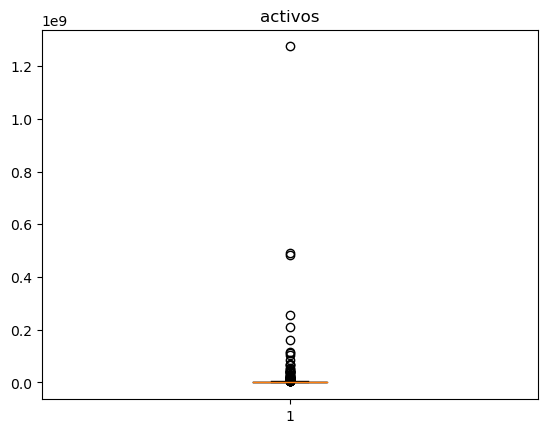

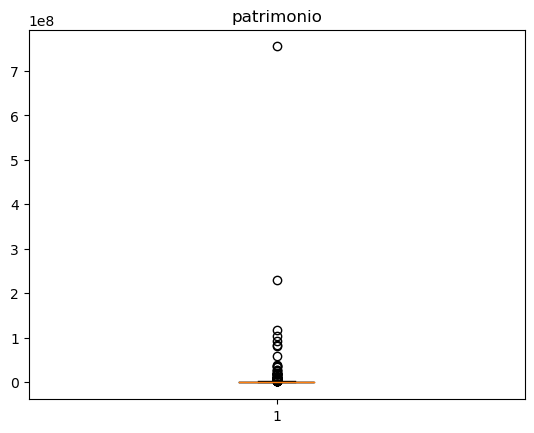

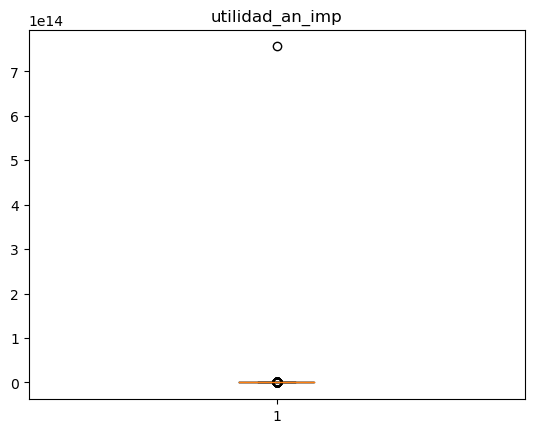

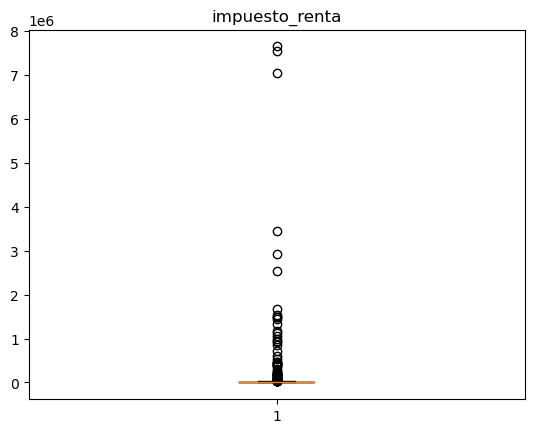

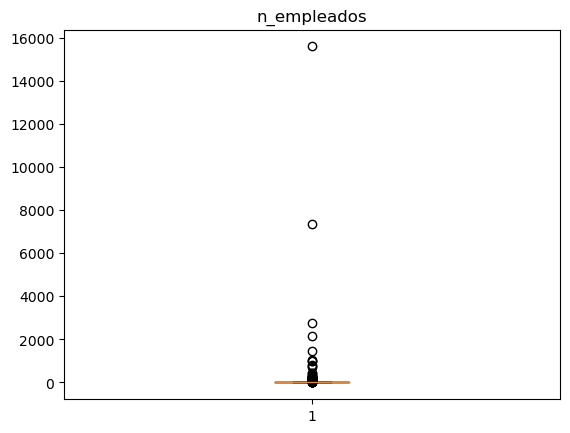

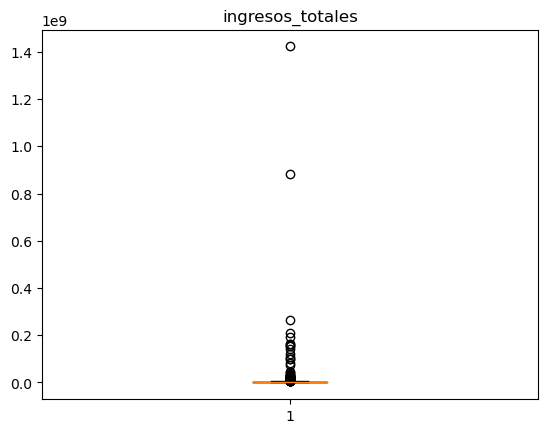

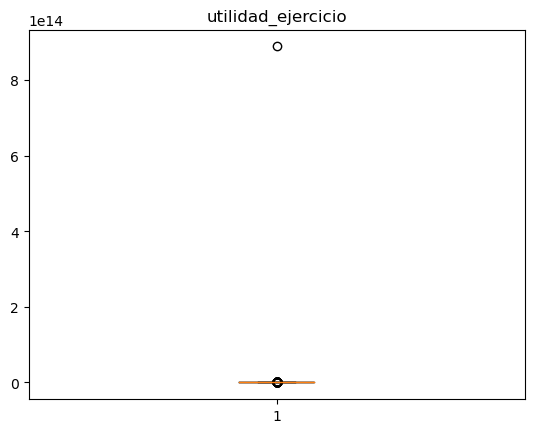

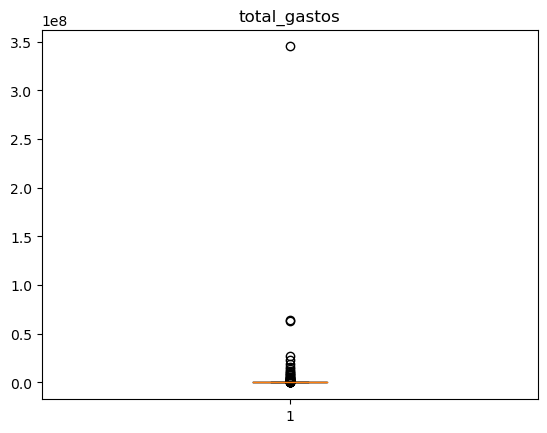

In [57]:
for variable in variables_cuantitativas:
    plt.figure()  
    plt.boxplot(datos_companias[variable])
    plt.title(variable)

Del análisis de los histogramas y digramas de caja, se concluye que existe un gran desbalance en términos económicos entre las empresas. En este caso, los datos anómalos no conviene retirarlos pues correspoden a las empresas más grandes, con quienes será más fácil trabajar.

Finalmente, es probable que las variables hasta ahora seleccionadas se encuentren correlacionadas. En este caso, se deberían eliminar variables que no aporten información adicional.Se empezará por eliminar las variables que sabemos tienen una correlación directa.

Adicionalmente, se designran con el valor de "0" a las empresas no certificadas. Los datso ausentes de las variables cuantitativas seleccionadas se rellenaran con la mediana.

**Selección de variables mediante un análisis de correlaciones**

In [58]:
# Función para seleccionar variables independientes
def select_independent_variables(dataframe, threshold=0.7):
    # Calcular matriz de correlación
    correlation_matrix = dataframe.corr()
    
    # Seleccionar variables con coeficientes de correlación por debajo del umbral
    independent_variables = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) < threshold:
                independent_variables.add(correlation_matrix.columns[i])
                independent_variables.add(correlation_matrix.columns[j])
    
    return list(independent_variables)

# Seleccione variables independientes con un umbral de correlación de 0,7
independent_vars = select_independent_variables(datos_companias, threshold=0.7)
len(independent_vars)

49

El análisis de correlaciones determinó que la gran mayoría de variables son independientes. Por lo tanto, se escogerán las mismas por criterio experto. 

In [59]:
# Selección de variables
datos_companias = datos_companias[['cia_imvalores', 'ingresos_ventas', 'activos', 
                          'patrimonio', 'utilidad_an_imp',
                          'impuesto_renta', 'n_empleados',
                          'ingresos_totales', 'utilidad_ejercicio',
                          'total_gastos', 'ruc', 'certificada']]

datos_companias = datos_companias.reset_index(drop=True)
datos_companias.head(5)

,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,total_gastos,ruc,certificada
0,0.0,437050.25,377747.45,348847.81,50.25,0.00,5.0,437050.25,50.25,437000.00,0992653817001,0.0
1,0.0,18888715.19,10500264.15,8238260.46,1540893.69,404865.45,99.0,18889511.91,1812816.11,478220.48,0990171092001,1.0
2,0.0,3803688.33,3426961.86,2957665.18,0.00,65948.54,23.0,3803775.92,0.00,564151.46,0992659351001,0.0
3,0.0,98973138.59,53848447.07,9721729.00,1862914.34,598097.35,702.0,99430785.32,2191663.93,9680453.75,0990442991001,0.0
4,0.0,4923600.38,2418333.57,1640884.02,0.00,63737.99,59.0,5056825.64,0.00,813683.62,1790291774001,0.0


In [60]:
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cia_imvalores       512 non-null    float64
 1   ingresos_ventas     512 non-null    float64
 2   activos             512 non-null    float64
 3   patrimonio          512 non-null    float64
 4   utilidad_an_imp     512 non-null    float64
 5   impuesto_renta      512 non-null    float64
 6   n_empleados         512 non-null    float64
 7   ingresos_totales    512 non-null    float64
 8   utilidad_ejercicio  512 non-null    float64
 9   total_gastos        512 non-null    float64
 10  ruc                 512 non-null    object 
 11  certificada         512 non-null    float64
dtypes: float64(11), object(1)
memory usage: 48.1+ KB


### 4.1 Conclusiones Intermedias Pre-Procesamiento de datos <a id="4.1"></a>

- Existió un conflicto de integridad de datos con los números de RUC que empezaban con cero. Esto requirió un proceso de homgeneización.

- Se levantó una base de datos 29 empresas del sector de acuicultura en Ecuador, certificadas por el "Aquaculture Stwewarship Council" (ASC). Cabe señalar que el levantamiento de datos fue manual a partir de los datos de la aplicación ARCGis Web de la ASC, y que podrían existir más. No obstante, la base generada es más consistente y completa que otras también disponibles en línea. También se debe mencionar que la discrepancia entre la base levantada y la totalidad de datos es probablemente mínima.   

- El sector de acuicultura  cuenta con 18,627 empresas en la base de datos de la Superintendencia de Compañías de Ecuador para el año 2023. En ese sentido, se tuvo que definir un parámetro económico-financiero para filtrar a las empresas en capacidad de recibir préstamos. El criterio escogido fue el de índice de liquidez corriente mayor o igual a uno. Con este parámetro la base se limita a 512 empresas. De las empresas certificads por la ASC, 12 pasan el filtro de capacidad económica-financiera. En en base a los datos de estas 12 empresas se correrá el algoritmo de "k nearest neighors".

- Más del 50 % de empresas de acuicultura no registraron ingresos por ventas en el año 2023. En contraste, a partir del percentil 75 las empresas recibieron más de 5 millones de dólares por ingresos en este mismo año. 


## 5. MODELACIÓN <a id="5"></a>

In [61]:
# Escalado de datos

feature_names = ['cia_imvalores', 'ingresos_ventas', 'activos', 
                          'patrimonio', 'utilidad_an_imp',
                          'impuesto_renta', 'n_empleados',
                          'ingresos_totales', 'utilidad_ejercicio',
                          'total_gastos']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(datos_companias[feature_names].to_numpy())

datos_companias_escalado = datos_companias.copy()
datos_companias_escalado.loc[:, feature_names] = transformer_mas.transform(datos_companias[feature_names].to_numpy())

In [62]:
datos_companias_escalado.sample(5)

,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,total_gastos,ruc,certificada
19,0.0,0.010448,0.053446,0.047932,1.741523e-09,0.053814,0.006668,0.011934,1.532123e-09,0.000188,0992672595001,0.0
348,0.0,0.000460,0.000681,0.000661,-6.547616e-10,0.000944,0.000705,0.000457,4.337565e-11,0.000353,1191768988001,0.0
112,0.0,0.002338,0.010028,0.007233,1.412811e-10,0.007707,0.002372,0.004042,1.412811e-10,0.004993,0992401591001,0.0
489,0.0,0.000000,0.000005,0.000007,-6.270610e-12,0.000000,0.000128,0.000000,-5.330019e-12,0.000014,0791840313001,0.0
482,0.0,0.000351,0.000204,0.000240,2.499997e-10,0.001139,0.000192,0.000348,2.499997e-10,0.000016,2490399359001,0.0


In [63]:
# Función que devuelve los vecinos más cercanos 

def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    
    :param k: el número de vecinos cercanos a calcular
    :param n: número de usuario para el que se buscan los vecinos más cercanos 
    """
    
    # Crea la instancia del algoritmo de clasificación
    # Define los parámetros del algoritmo de clasificación en donde:
        # "algorithm" es el algoritmo usado  para calcular los vecinos cercanos (fijado en "auto" para que la función escoja el, mejor algoritmo en base al ajuste de los datos usando el método "fit")
        # "metric" corresponde a la métrica de distancia
        # Ajusta el algoritmo a los datos de entrada provistos usando el método fit
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto', metric=metric).fit(df) 
                                                                                      
    # Se aplica el método "kneighbors" al modelo para obtener los vecinos (en este caso clientes) más cercanos  
    # Los parámetros de método son:
        #"X", en este caso "[df.iloc[n]]" que seleciona el punto de consulta (en este caso cliente)                                                                                             
        #"return_distance=True" se establece que método devuelva las distancias que determinaron la selección de los vecinos                                                                                        
    # El método devuelve dos resultados:                                                                                          
        #"neigh_dist" en este caso "nbrs_distances", que representa una matriz con las distancias del punto de consulta (cliente) a los vecinos cercanos                                                                                 
        #"neigh_ind" en este caso "nbrs_indices", que representa los índices del "dataframe" de los vecinos cercanos al punto de consulta (cliente)                                                                                                                                                             
                                                                                        
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n]], k, return_distance=True) 
    
    
    #Concatena los resultados de método "kneighbors" para devolver un "dataframe" de respuesta
    #Extrae todos los datos del vecino cercano seleccionado (en base al método "kneighbors") de acuerdo al valor de su índice. Estos datos se extraen del "dataframe" original "df"
    #Añade la columna de distancia al "dataframe" de respuesta, suando los siguientes parámetros: 
        #índice del vecino cercano (cliente) "index=nbrs_indices[0]"
        #matriz transpuesta de los resultados de las distancias de los vecinos cercanos
        #nombre de la nueva colunma "columns=['distance']"
        
    df_res = pd.concat([ 
        df.iloc[nbrs_indices[0]],   
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance']) 
        ], axis=1)                                                                      
                                                                                                                                                                                
    return df_res

In [64]:
# Registros de compañías certificadas
datos_companias_certificadas = datos_companias[datos_companias["certificada"] == 1] 
datos_companias_certificadas

,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,total_gastos,ruc,certificada
1,0.0,1.888872e+07,1.050026e+07,8.238260e+06,1.540894e+06,404865.45,99.0,1.888951e+07,1.812816e+06,4.782205e+05,0990171092001,1.0
7,0.0,1.291687e+07,9.155118e+06,7.038264e+06,0.000000e+00,537728.49,45.0,1.291924e+07,2.461776e+06,4.288525e+05,0990555575001,1.0
9,0.0,1.412874e+09,1.274285e+09,7.549777e+08,1.301194e+08,7555992.54,15598.0,1.422904e+09,1.465574e+08,3.451556e+08,0991257721001,1.0
10,0.0,1.934767e+08,1.612697e+08,1.033155e+08,0.000000e+00,7649597.29,1010.0,1.935134e+08,0.000000e+00,1.192257e+07,0990576459001,1.0
15,0.0,1.271823e+07,1.092104e+07,7.696617e+06,-1.421508e+05,0.00,97.0,1.273706e+07,-1.421508e+05,5.303677e+05,0790050487001,1.0
23,0.0,2.238434e+07,3.117912e+07,2.361815e+07,2.153434e+06,476130.06,117.0,2.268357e+07,2.533452e+06,1.035219e+06,0990666407001,1.0
25,0.0,8.814401e+08,4.892768e+08,2.303004e+08,7.612128e+07,7047425.16,7347.0,8.821126e+08,8.955445e+07,6.319420e+07,0990608504001,1.0
26,0.0,3.785528e+07,5.084220e+07,1.883837e+07,4.245731e+06,1326276.56,119.0,3.785528e+07,5.052222e+06,2.261592e+06,0990621705001,1.0
55,0.0,1.545605e+08,8.602257e+07,1.861091e+07,0.000000e+00,849183.82,2173.0,1.552446e+08,3.415214e+06,1.626772e+07,0991329331001,1.0
169,0.0,8.104067e+07,1.140720e+08,5.923711e+07,0.000000e+00,1677529.49,448.0,8.125415e+07,0.000000e+00,8.000865e+06,0992721138001,1.0


In [65]:
# Datos escalados con distancia "Euclidiana"
get_knn(datos_companias_escalado, 1, 5, "euclidean")

,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,total_gastos,ruc,certificada,distance
1,0.0,0.013369,0.008240,0.010912,2.038353e-09,0.052926,0.006347,0.013275,2.038353e-09,0.001386,0990171092001,1.0,0.0
11,1.0,0.115066,0.380026,0.155554,3.763319e-09,0.123902,0.066098,0.114824,2.297520e-09,0.066084,0990071969001,0.0,99123000.0
3,0.0,0.070051,0.042258,0.012877,2.464334e-09,0.078187,0.045006,0.069879,2.464334e-09,0.028047,0990442991001,0.0,271899000.0
8,0.0,0.006239,0.004414,0.006335,2.876308e-10,0.007610,0.003206,0.006195,2.106250e-10,0.024996,0990475962001,0.0,304870000.0
13,0.0,0.013234,0.005517,0.004420,1.909327e-09,0.055558,0.005321,0.013141,1.909327e-09,0.001574,0990486859001,0.0,315767000.0


In [66]:
# Datos escalados con distancia "Euclidiana"
get_knn(datos_companias_escalado, 7, 5, "euclidean")

,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,total_gastos,ruc,certificada,distance
7,0.0,0.009142,0.007185,0.009322,0.000000e+00,0.070295,0.002885,0.009079,2.768051e-09,0.001242,0990555575001,1.0,0.0
6,0.0,0.014737,0.017964,0.015503,7.208293e-09,0.129840,0.012437,0.014706,7.208293e-09,0.002963,0990549591001,0.0,5984000.0
10,0.0,0.136938,0.126557,0.136846,0.000000e+00,1.000000,0.064752,0.135999,0.000000e+00,0.034543,0990576459001,1.0,20884000.0
5,0.0,0.007353,0.030523,0.024255,1.263448e-09,0.031214,0.001859,0.007377,1.277120e-09,0.003418,0990532672001,0.0,22903000.0
12,0.0,0.005143,0.003515,0.004581,0.000000e+00,0.021913,0.002693,0.005107,8.694450e-10,0.000557,0990529140001,0.0,26435000.0


### 5.1 Conclusiones Intermedias Modelación <a id="5.1"></a>

- Como se planificó, el algoritmo "k nearest neighbors" es capaz de identificar las empresas que más se asemejan en términos económico-financieros a las empresas certificadas por la ASC (y que pasan el filtro para ser sujetos de crédito). Esto en función de las variables seleccionadas por criterio experto. 

In [67]:
def dataframe_de_resultados(df1, df2, func, param1, param2):

    resultados = []
    for index in df1.index:
        resultado = func(df2, index, param1, param2) 
        resultados.append(resultado)
    
    # Concatena los resultados en un nuevo DataFrame
    nuevo_df = pd.concat(resultados)
    
    # Elimina los duplicados
    nuevo_df = nuevo_df.drop_duplicates(subset='ruc', keep='first')
    
    # Elimina los datos de las empresas certificadas
    
    nuevo_df = nuevo_df[nuevo_df.certificada == 0]
    
    # Devuelve los ceros a la columna de RUC
    
    nuevo_df['ruc'] = nuevo_df['ruc'].map(str)
    #nuevo_df['ruc'] = nuevo_df['ruc'].apply(lambda x: '0' + x if x[0] != '1' else x)
    
    ruc = nuevo_df['ruc']
    
    # Realiza un "join" para obtener los datos completos de las empresas
    mask = compania['ruc'].isin(ruc)
    df_final = compania[mask]
    df_final = df_final.drop(["expediente", "pro_codigo", "Unnamed: 6", "tipo"], axis=1)
    
    return df_final


In [68]:
resultados = dataframe_de_resultados(datos_companias_certificadas, datos_companias_escalado, get_knn, 10, "euclidean")
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 9914 to 208782
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ruc        59 non-null     object
 1   nombre     59 non-null     object
 2   provincia  59 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [69]:
resultados

,ruc,nombre,provincia
9914,0990442991001,CRIMASA CRIADEROS DE MARISCOS SA,GUAYAS ...
15754,0990532672001,DELANAN DESARROLLO LANGOSTINERO SA,EL ORO ...
15902,0990549591001,CAMARONERA AGROMARINA SA,GUAYAS ...
16383,0990475962001,MARAGRO SA,GUAYAS ...
21671,0990071969001,EMPACADORA GRUPO GRANMAR S.A. EMPAGRAN,GUAYAS ...
23649,0990529140001,CONSAVE C.A,GUAYAS ...
23867,0990486859001,CAMARONERA DELI S A,GUAYAS ...
24003,0990497214001,CAMARONERA LEBAMA SA,GUAYAS ...
25591,0991005420001,CRIADEROS DE MARISCOS DE NARANJAL (CRIMARNA) S.A.,GUAYAS ...
33884,0790092597001,CAMARONERA BRAVOGRANDE S.A.,EL ORO ...


In [70]:
resultados.to_csv('base_de_prospectos_ampliada.csv', index=False)  

## 6. CONCLUSIONES FINALES Y LIMITACIONES <a id="6"></a>

### 6.1 Conclusiones finales <a id="6.1"></a>

- Se levantó una base de datos 29 empresas del sector de acuicultura en Ecuador, certificadas por el "Aquaculture Stwewarship Council" (ASC). Por otra parte, el sector de acuicultura  cuenta con 18,627 empresas en la base de datos de la Superintendencia de Compañías de Ecuador para el año 2023. En ese sentido, se tuvo que definir un parámetro económico-financiero para filtrar a las empresas en capacidad de recibir préstamos. El criterio escogido fue el de índice de liquidez corriente mayor o igual a uno. Con este parámetro la base se limita a 512 empresas. De las empresas certificads por la ASC, 12 pasan el filtro de capacidad económica-financiera. En en base a los datos de estas 12 empresas se corrió el algoritmo de "k nearest neighbors". Cabe señalar que estas 12 empresas son los prospectos principales al estar certificadas y ser sujetos de crédito.  

- Como se planificó, el algoritmo "k nearest neighbors" es capaz de identificar las empresas que más se asemejan en términos económico-financieros a las empresas certificadas por la ASC (y que pasan el filtro para ser sujetos de crédito). Esto en función de las variables seleccionadas por criterio experto. Seleccionando un valor k= 10 por cada empresas certificad por la ASC y que es sujeto de crédito, el algoritmo devuleve una base de 59 nuevos prospectos.  

### 6.2 Limitaciones <a id="6.2"></a>

- Falta de acceso a bases de datos ambientales empresariales: Un proyecto a gran escala necesitará necesariamente la generación de bases de datos ambientales empresarias a nivel nacional. O en su defecto, la inversión para el acceso a APIs internacionales que permitan  hacer una comparación. En ese sentido, los resultados resultarían ser una aproximación que requerirá una investigación personalizada de cada prospecto. 

- Falta de datos etiquetados: En virtud de que no se cuenta con información de que empresas ya han recibido préstamos azules, no se puede realizar una modelación predictiva supervisada. En ese sentido se optó por aplicar “K nearest neiborhs” para buscar empresas similares con los pocos datos etiquetados con los que se cuentan. No obstante, los resutlados podrían ser imprecisos. Por ejemplo, se podrían identificar empresas que ya hayan recibido préstamos verdes pero que no lo sepamos por falta de cruce de información entre instituciones financieras.